In [ ]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

# フィッツフュー・南雲モデル

\begin{align}
\epsilon\frac{dx}{dt}&=x-\frac{x^3}{3}-z \hspace{1cm}(0<\epsilon<<1)　\\
\frac{dz}{dt}&=ax-z
\end{align}

In [ ]:
# 試行回数
n = 100000  

# 表示するデータ数=n/m
m = 1000

# パラメーター
epsilon = 0.01
a = 0.1 # Nagumo model a = 0.1

# 初期値
x_0 = 0.5
z_0 = 0.5
t_0 = 0.0

# ステップ幅
h = 0.001

# 計算結果を格納する配列
listT = []
listX = []
listZ = []
listvX = []
listvZ = []

# F = dx/dt
def F(x, z):
    return (1.0 / epsilon) * (x - x * x * x / 3.0 - z)

# G = dz/dt
def G(x, z):
    return a * x - z

# calculate the time evolution
def runge(x0, z0, t0, h, n):
    x = x0
    z = z0
    t = t0
    print("t x z dxdt dzdt")

    for i in range(n):
        t = t0 + i * h
        kx1 = F(x, z)
        kz1 = G(x, z)
        kx2 = F(x + kx1 * h * 0.5, z + kz1 * h * 0.5)
        kz2 = G(x + kx1 * h * 0.5, z + kz1 * h * 0.5)
        kx3 = F(x + kx2 * h * 0.5, z + kz2 * h * 0.5)
        kz3 = G(x + kx2 * h * 0.5, z + kz2 * h * 0.5)
        kx4 = F(x + kx3 * h, z + kz3 * h)
        kz4 = G(x + kx3 * h, z + kz3 * h)
        x += (kx1 + 2.0 * kx2 + 2.0 * kx3 + kx4) * (h / 6.0)
        z += (kz1 + 2.0 * kz2 + 2.0 * kz3 + kz4) * (h / 6.0) 
        listT.append(t)
        listX.append(x)
        listZ.append(z)
        listvX.append(kx1)
        listvZ.append(kz1)
        if( i % m == 0):
            print(t,x,z,kx1,kz1)

    return 0

def main():
    runge(x_0, z_0, t_0, h, n)
 
if __name__ == '__main__':
    main()

t x z dxdt dzdt
0.0 0.4956958674995357 0.4995500121126929 -4.166666666666669 -0.45
1.0 -1.7672468412206648 0.07137893985288382 0.11742553860000504 -0.24836359512475042
2.0 -1.6896196657662483 -0.08223936663924697 0.04704610583824986 -0.0868140705998745
3.0 -1.6597702985190799 -0.1358107557405239 0.017308992414097335 -0.030198186351967388
4.0 -1.648988524117915 -0.1544268658523231 0.006135056486003543 -0.010483077275118408
5.0 -1.6451938859922808 -0.16088687216092484 0.0021439286819496806 -0.003636365158602217
6.0 -1.6438711937950263 -0.1631274139170198 0.0007454109438809198 -0.0012610403369537337
7.0 -1.6434117243605542 -0.16390436556736795 0.0002587063832160119 -0.00043726976391197936
8.0 -1.64325230796019 -0.16417377159881227 8.973234794928953e-05 -0.00015161970512883594
9.0 -1.64319702032686 -0.16426718539731233 3.111697303992411e-05 -5.257228988142515e-05
10.0 -1.6431778486524355 -0.16429957543232773 1.0789794949173093e-05 -1.822873040410733e-05
11.0 -1.643171200970174 -0.164310806

### データのプロット $x-t$

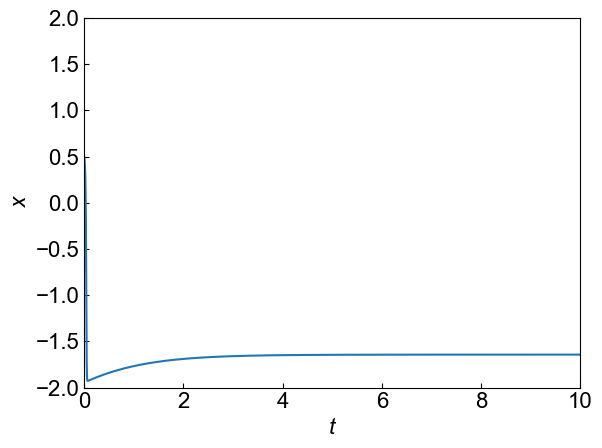

In [ ]:
# フォントとサイズ
plt.rcParams["font.family"] = "Arial"   
plt.rcParams["font.size"] = 16                

# 図のスペースを確保 (dpiで解像度指定)
fig, ax = plt.subplots(dpi=100)

# プロットするデータを選択
ax.plot(listT,listX)

# 軸ラベル
ax.set_xlabel("t", style="italic")
ax.set_ylabel("x", style="italic")

# 軸範囲
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)

# メモリを内向きに表示
ax.tick_params(direction='in')

#plt.show()

# 図を保存する
now = datetime.datetime.now()
filename = 'x_vs_t_' + now.strftime('%Y%m%d_%H%M%S') + '.png'
plt.savefig(filename)

### データのプロット $z-t$

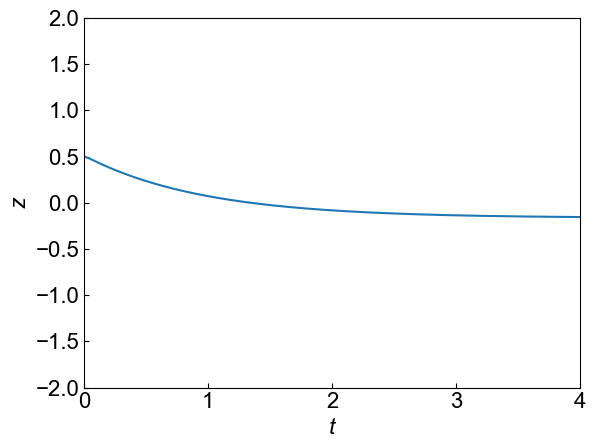

In [ ]:
# フォントとサイズ
plt.rcParams["font.family"] = "Arial"   
plt.rcParams["font.size"] = 16                

# 図のスペースを確保 (dpiで解像度指定)
fig, ax = plt.subplots(dpi=100)

# プロットするデータを選択
ax.plot(listT,listZ)

# 軸ラベル
ax.set_xlabel("t", style="italic")
ax.set_ylabel("z", style="italic")

# 軸範囲
ax.set_xlim(0, 4)
ax.set_ylim(-2, 2)

# メモリを内向きに表示
ax.tick_params(direction='in')

#plt.show()

# 図を保存する
now = datetime.datetime.now()
filename = 'z_vs_t_' + now.strftime('%Y%m%d_%H%M%S') + '.png'
plt.savefig(filename)

### データのプロット $z-x$

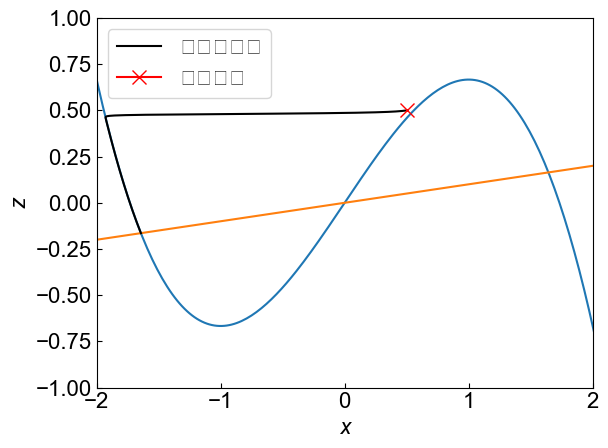

In [ ]:
import datetime

# フォントとサイズ
plt.rcParams["font.family"] = "Arial"   
plt.rcParams["font.size"] = 16                

# ここでは listX, listZ がすでに定義されている前提
# 初期値も使う
x_0 = 0.5
z_0 = 0.5


# 図のスペースを確保 (dpiで解像度指定)
fig, ax = plt.subplots(dpi=100)
#関数のオーバーレイ
x=np.linspace(-10,10,1000)
y1=-x**3/3+x
plt.plot(x,y1)
y2=a*x
plt.plot(x,y2)
# 元のプロット
ax.plot(listX, listZ, label="元のデータ", color="black")


# 初期位置を × 印でプロット（★追加）
ax.plot(x_0, z_0, marker='x', color='red', markersize=10, label='初期位置')
# 軸ラベル
ax.set_xlabel("x", style="italic")
ax.set_ylabel("z", style="italic")

# 軸範囲
ax.set_xlim(-2, 2)  # 元のデータに合わせた範囲（必要に応じて調整）
ax.set_ylim(-1, 1)

# メモリを内向きに表示
ax.tick_params(direction='in')

# 凡例
ax.legend()

# 表示
plt.show()


保存されたデータ点数: 900


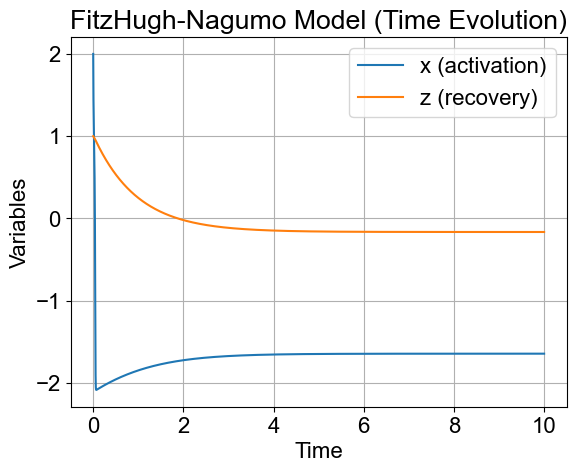

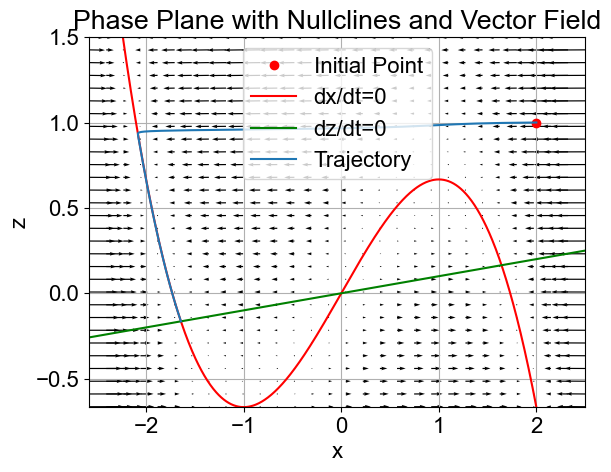

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- パラメータ設定 ---
epsilon = 0.01  # 小さいほど x の反応が速い
a = 0.1        # z のフィードバック係数

# --- 微分方程式（FitzHugh–Nagumo 遅速系）---
def fhn_model(state, t):
    x, z = state
    dxdt = (x - x**3 / 3 - z) / epsilon
    dzdt = a * x - z
    return [dxdt, dzdt]

# --- 初期条件と時間軸 ---
x0 = 2.0
z0 = 1.0
initial_state = [x0, z0]
t = np.arange(0.0, 10, 0.001)

# --- 数値積分 ---
solution = odeint(fhn_model, initial_state, t)
x = solution[:, 0]
z = solution[:, 1]
# --- 時間変化プロット ---
plt.figure()
plt.plot(t, x, label="x (activation)")
plt.plot(t, z, label="z (recovery)")
plt.title("FitzHugh-Nagumo Model (Time Evolution)")
plt.xlabel("Time")
plt.ylabel("Variables")
plt.grid()
plt.legend()

# --- 相図 + ヌルクライン + ベクトル場 ---
plt.figure()
plt.plot(x0, z0, 'ro', label="Initial Point")  # ← 追加：初期位置を赤丸で表示
plt.xlabel("x")
plt.ylabel("z")
plt.title("Phase Plane with Nullclines and Vector Field")

# 範囲を広めに設定
padding = 0.5
xmin, xmax = x.min() - padding, x.max() + padding
zmin, zmax = z.min() - padding, z.max() + padding

# メッシュグリッドの作成
X, Z = np.meshgrid(np.linspace(xmin, xmax, 30), np.linspace(zmin, zmax, 30))
# ベクトル場の計算
dX = (X - X**3 / 3 - Z) / epsilon
dZ = a * X - Z
norm = np.sqrt(dX**2 + dZ**2)  # 正規化用
with open("vector_field.dat", "w") as f:
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x0 = X[i, j]
            z0 = Z[i, j]
            n = norm[i, j]

            # ゼロ除算回避
            if n == 0:
                continue  # この点はスキップ

            dx = dX[i, j] / n
            dz = dZ[i, j] / n
            scale = 1
            x1 = x0 + dx * scale
            z1 = z0 + dz * scale

            # 書き込み
            f.write(f"{x0} {z0} {x1} {z1}\n")
print("保存されたデータ点数:", sum(1 for line in open("vector_field.dat")))


plt.quiver(X, Z, dX, dZ, angles="xy")  # 正規化して描画

# ヌルクライン：dx/dt = 0（赤）、dz/dt = 0（緑）
# --- ヌルクラインを関数として滑らかに描画 ---
x_null = np.linspace(xmin, xmax, 1000)  # より細かい x 値
z_null_dxdt = x_null - x_null**3 / 3    # dx/dt = 0（赤）
z_null_dzdt = a * x_null                # dz/dt = 0（緑）

plt.plot(x_null, z_null_dxdt, color='red', linewidth=1.5, label='dx/dt=0')
plt.plot(x_null, z_null_dzdt, color='green', linewidth=1.5, label='dz/dt=0')

plt.plot(x, z, label="Trajectory")

# 軸範囲・グリッド
plt.xlim([xmin, xmax])
plt.ylim([zmin, zmax])
plt.grid()
plt.legend()
plt.show()



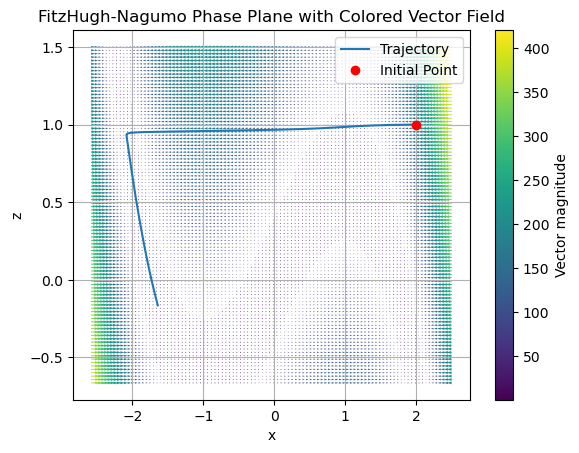

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- パラメータ設定 ---
epsilon = 0.01
a = 0.1

# --- モデル定義 ---
def fhn_model(state, t):
    x, z = state
    dxdt = (x - x**3 / 3 - z) / epsilon
    dzdt = a * x - z
    return [dxdt, dzdt]

# --- 初期条件と時間軸 ---
x0, z0 = 2.0, 1.0
initial_state = [x0, z0]
t = np.arange(0.0, 10, 0.001)

# --- 数値積分 ---
solution = odeint(fhn_model, initial_state, t)
x = solution[:, 0]
z = solution[:, 1]

# --- ベクトル場の描画用グリッド ---
padding = 0.5
xmin, xmax = x.min() - padding, x.max() + padding
zmin, zmax = z.min() - padding, z.max() + padding
X, Z = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(zmin, zmax, 100))
dX = (X - X**3 / 3 - Z) / epsilon
dZ = a * X - Z
magnitude = np.sqrt(dX**2 + dZ**2)  # 各点のベクトルの大きさ

# --- ベクトル場を描画（色は大きさで変化）---
plt.figure()
Q = plt.quiver(X, Z, dX, dZ, magnitude, cmap='viridis')  # 色に大きさを反映
plt.colorbar(Q, label="Vector magnitude")

# --- 軌道と初期点 ---
plt.plot(x, z, label="Trajectory")
plt.plot(x0, z0, 'ro', label="Initial Point")

plt.xlabel("x")
plt.ylabel("z")
plt.title("FitzHugh-Nagumo Phase Plane with Colored Vector Field")
plt.legend()
plt.grid()
plt.show()


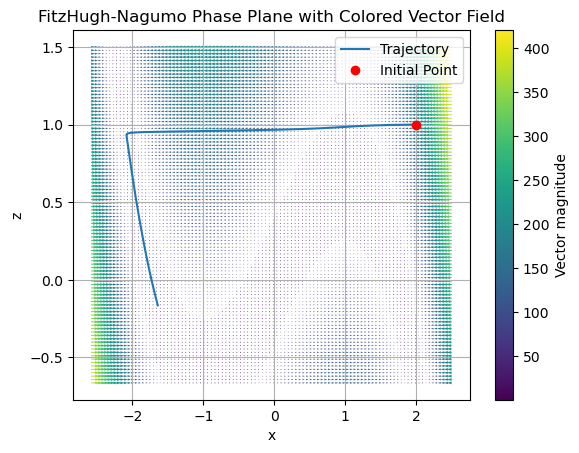

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- パラメータ設定 ---
epsilon = 0.01
a = 0.1

# --- モデル定義 ---
def fhn_model(state, t):
    x, z = state
    dxdt = (x - x**3 / 3 - z) / epsilon
    dzdt = a * x - z
    return [dxdt, dzdt]

# --- 初期条件と時間軸 ---
x0, z0 = 2.0, 1.0
initial_state = [x0, z0]
t = np.arange(0.0, 10, 0.001)

# --- 数値積分 ---
solution = odeint(fhn_model, initial_state, t)
x = solution[:, 0]
z = solution[:, 1]

# --- ベクトル場の描画用グリッド ---
padding = 0.5
xmin, xmax = x.min() - padding, x.max() + padding
zmin, zmax = z.min() - padding, z.max() + padding
X, Z = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(zmin, zmax, 100))
dX = (X - X**3 / 3 - Z) / epsilon
dZ = a * X - Z
magnitude = np.sqrt(dX**2 + dZ**2)  # 各点のベクトルの大きさ

# --- ベクトル場を描画（色は大きさで変化）---
plt.figure()
Q = plt.quiver(X, Z, dX, dZ, magnitude, cmap='viridis')  # 色に大きさを反映
plt.colorbar(Q, label="Vector magnitude")

# --- 軌道と初期点 ---
plt.plot(x, z, label="Trajectory")
plt.plot(x0, z0, 'ro', label="Initial Point")

plt.xlabel("x")
plt.ylabel("z")
plt.title("FitzHugh-Nagumo Phase Plane with Colored Vector Field")
plt.legend()
plt.grid()
plt.show()


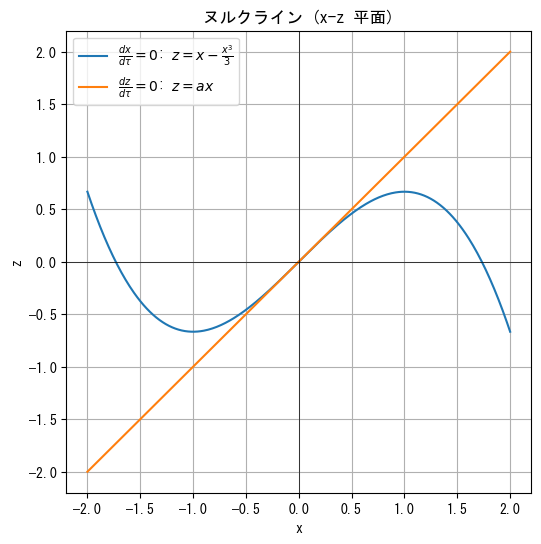

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'MS Gothic'
# パラメータ
a = 1.0

# xの範囲を定義
x = np.linspace(-2, 2, 400)

# ヌルクラインの定義
z_nullcline_dx = x - x**3/3   # dx/dτ = 0 のときの z
z_nullcline_dz = a * x      # dz/dτ = 0 のときの z

# 描画
plt.figure(figsize=(6, 6))
plt.plot(x, z_nullcline_dx, label=r"$\frac{dx}{d\tau} = 0$: $z = x - \frac{x^3}{3}$")
plt.plot(x, z_nullcline_dz, label=r"$\frac{dz}{d\tau} = 0$: $z = ax$")
plt.xlabel("x")
plt.ylabel("z")
plt.title("ヌルクライン (x-z 平面)")
plt.grid()
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


In [12]:
import numpy as np

# データ生成
x = np.linspace(-2, 2, 100)
y = x - x**3 / 3

# スペース区切りの.datファイルとして保存
with open("graph_data.dat", "w", encoding="utf-8") as f:
    for xi, yi in zip(x, y):
        f.write(f"{xi} {yi}\n")


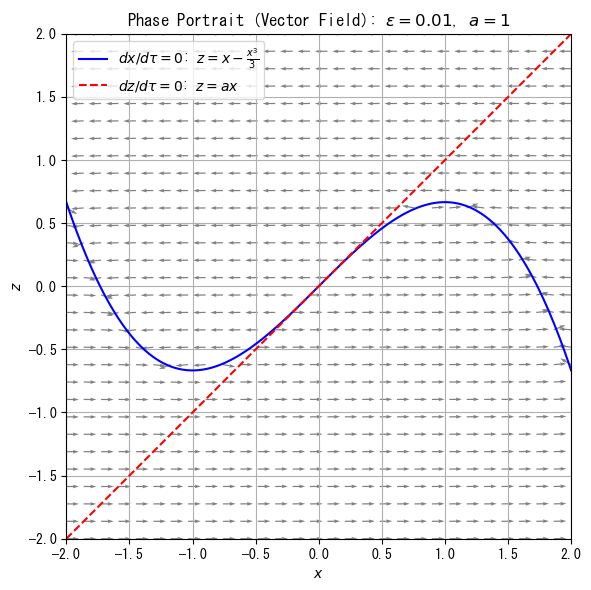

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
epsilon = 0.01
a = 1.0

# グリッド
x = np.linspace(-2, 2, 30)
z = np.linspace(-2, 2, 30)
X, Z = np.meshgrid(x, z)

# ベクトル場の定義
dxdt = (X - X**3 / 3 - Z) / epsilon
dzdt = a * X - Z

# 正規化
magnitude = np.sqrt(dxdt**2 + dzdt**2)
U = dxdt / magnitude
V = dzdt / magnitude

# ヌルクライン
x_null = np.linspace(-2, 2, 400)
z_null_dx = x_null - x_null**3 / 3
z_null_dz = a * x_null

# プロット
plt.figure(figsize=(8, 6))
plt.quiver(X, Z, U, V, angles='xy', scale_units='xy', scale=10, color='gray')
plt.plot(x_null, z_null_dx, 'b-', label=r'$dx/d\tau = 0$: $z = x - \frac{x^3}{3}$')
plt.plot(x_null, z_null_dz, 'r--', label=r'$dz/d\tau = 0$: $z = ax$')

plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.title(r'Phase Portrait (Vector Field): $\epsilon=0.01$, $a=1$')
plt.legend()
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


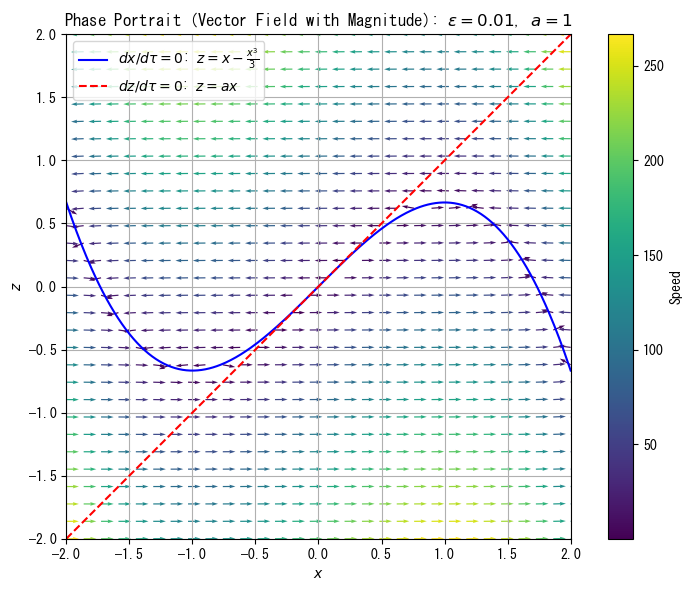

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
epsilon = 0.01
a = 1.0

# グリッド
x = np.linspace(-2, 2, 30)
z = np.linspace(-2, 2, 30)
X, Z = np.meshgrid(x, z)

# ベクトル場
dxdt = (X - X**3 / 3 - Z) / epsilon
dzdt = a * X - Z
magnitude = np.sqrt(dxdt**2 + dzdt**2)

# 正規化（矢印方向のみ）
U = dxdt / magnitude
V = dzdt / magnitude

# ヌルクライン
x_null = np.linspace(-2, 2, 400)
z_null_dx = x_null - x_null**3 / 3
z_null_dz = a * x_null

# プロット
plt.figure(figsize=(8, 6))
Q = plt.quiver(X, Z, U, V, magnitude, angles='xy', scale_units='xy', scale=10, cmap='viridis')
plt.colorbar(Q, label='Speed')
plt.plot(x_null, z_null_dx, 'b-', label=r'$dx/d\tau = 0$: $z = x - \frac{x^3}{3}$')
plt.plot(x_null, z_null_dz, 'r--', label=r'$dz/d\tau = 0$: $z = ax$')

plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.title(r'Phase Portrait (Vector Field with Magnitude): $\epsilon=0.01$, $a=1$')
plt.legend()
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


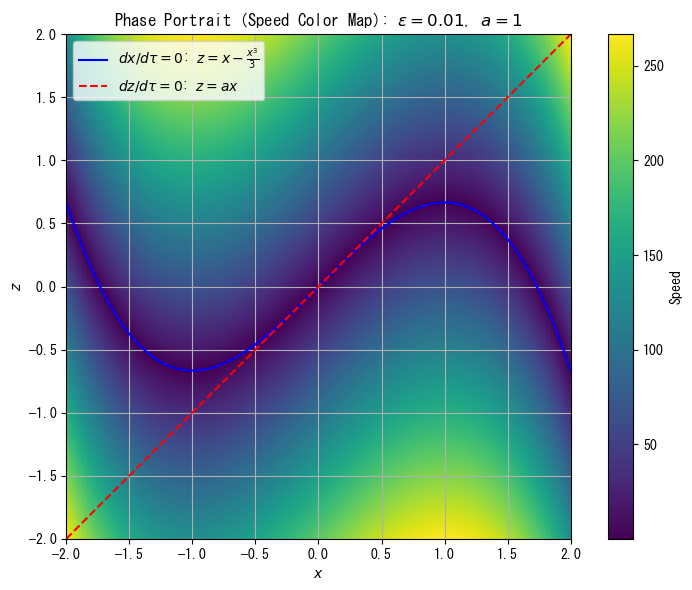

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
epsilon = 0.01
a = 1.0

# グリッド定義（高解像度）
x = np.linspace(-2, 2, 300)
z = np.linspace(-2, 2, 300)
X, Z = np.meshgrid(x, z)

# ベクトル場
dxdt = (X - X**3 / 3 - Z) / epsilon
dzdt = a * X - Z
speed = np.sqrt(dxdt**2 + dzdt**2)

# ヌルクライン
x_null = np.linspace(-2, 2, 400)
z_null_dx = x_null - x_null**3 / 3
z_null_dz = a * x_null

# プロット
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Z, speed, shading='auto', cmap='viridis')
plt.colorbar(c, label='Speed')

# ヌルクラインを重ねる
plt.plot(x_null, z_null_dx, 'b-', label=r'$dx/d\tau = 0$: $z = x - \frac{x^3}{3}$')
plt.plot(x_null, z_null_dz, 'r--', label=r'$dz/d\tau = 0$: $z = ax$')

plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.title(r'Phase Portrait (Speed Color Map): $\epsilon=0.01$, $a=1$')
plt.legend()
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


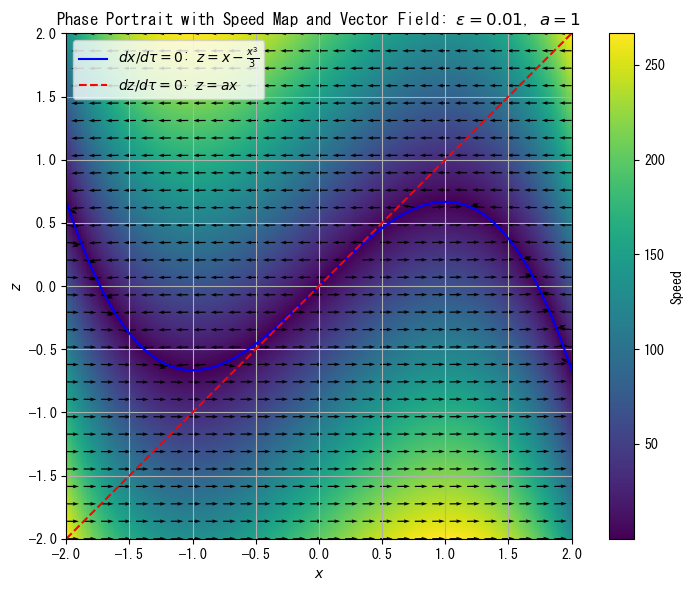

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
epsilon = 0.01
a = 1.0

# 高解像度グリッド（色用）
x = np.linspace(-2, 2, 300)
z = np.linspace(-2, 2, 300)
X, Z = np.meshgrid(x, z)

dxdt = (X - X**3 / 3 - Z) / epsilon
dzdt = a * X - Z
speed = np.sqrt(dxdt**2 + dzdt**2)

# ベクトル用グリッド（低解像度で矢印見やすく）
xq = np.linspace(-2, 2, 30)
zq = np.linspace(-2, 2, 30)
Xq, Zq = np.meshgrid(xq, zq)
dxq = (Xq - Xq**3 / 3 - Zq) / epsilon
dzq = a * Xq - Zq
magq = np.sqrt(dxq**2 + dzq**2)
Uq = dxq / magq
Vq = dzq / magq

# ヌルクライン
x_null = np.linspace(-2, 2, 400)
z_null_dx = x_null - x_null**3 / 3
z_null_dz = a * x_null

# プロット
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Z, speed, shading='auto', cmap='viridis')
plt.colorbar(label='Speed')

plt.quiver(Xq, Zq, Uq, Vq, angles='xy', scale_units='xy', scale=10, color='black')

plt.plot(x_null, z_null_dx, 'b-', label=r'$dx/d\tau = 0$: $z = x - \frac{x^3}{3}$')
plt.plot(x_null, z_null_dz, 'r--', label=r'$dz/d\tau = 0$: $z = ax$')

plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.title(r'Phase Portrait with Speed Map and Vector Field: $\epsilon=0.01$, $a=1$')
plt.legend()
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("BZ_graph6.pdf", format="pdf", bbox_inches='tight')
plt.show()


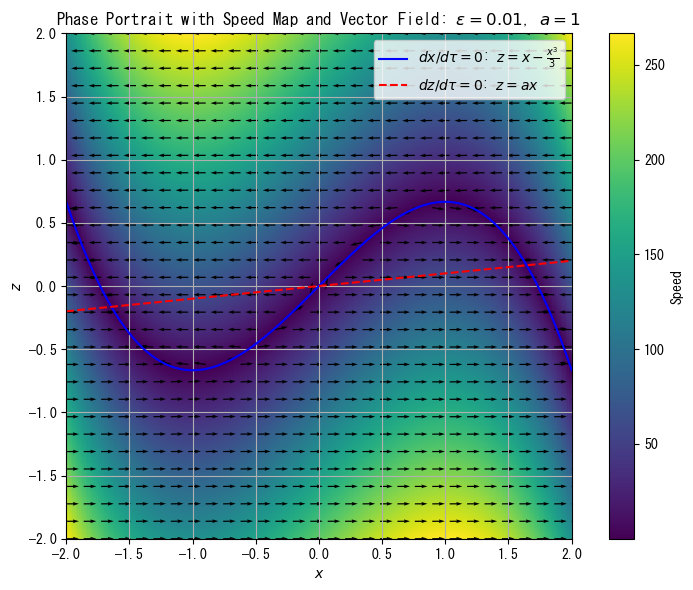

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
epsilon = 0.01
a = 0.1

# 高解像度グリッド（色用）
x = np.linspace(-2, 2, 300)
z = np.linspace(-2, 2, 300)
X, Z = np.meshgrid(x, z)

dxdt = (X - X**3 / 3 - Z) / epsilon
dzdt = a * X - Z
speed = np.sqrt(dxdt**2 + dzdt**2)

# ベクトル用グリッド（低解像度で矢印見やすく）
xq = np.linspace(-2, 2, 30)
zq = np.linspace(-2, 2, 30)
Xq, Zq = np.meshgrid(xq, zq)
dxq = (Xq - Xq**3 / 3 - Zq) / epsilon
dzq = a * Xq - Zq
magq = np.sqrt(dxq**2 + dzq**2)
Uq = dxq / magq
Vq = dzq / magq

# ヌルクライン
x_null = np.linspace(-2, 2, 400)
z_null_dx = x_null - x_null**3 / 3
z_null_dz = a * x_null

# プロット
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Z, speed, shading='auto', cmap='viridis')
plt.colorbar(label='Speed')

plt.quiver(Xq, Zq, Uq, Vq, angles='xy', scale_units='xy', scale=10, color='black')

plt.plot(x_null, z_null_dx, 'b-', label=r'$dx/d\tau = 0$: $z = x - \frac{x^3}{3}$')
plt.plot(x_null, z_null_dz, 'r--', label=r'$dz/d\tau = 0$: $z = ax$')

plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.title(r'Phase Portrait with Speed Map and Vector Field: $\epsilon=0.01$, $a=1$')
plt.legend()
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("BZ_graph7.pdf", format="pdf", bbox_inches='tight')
plt.show()


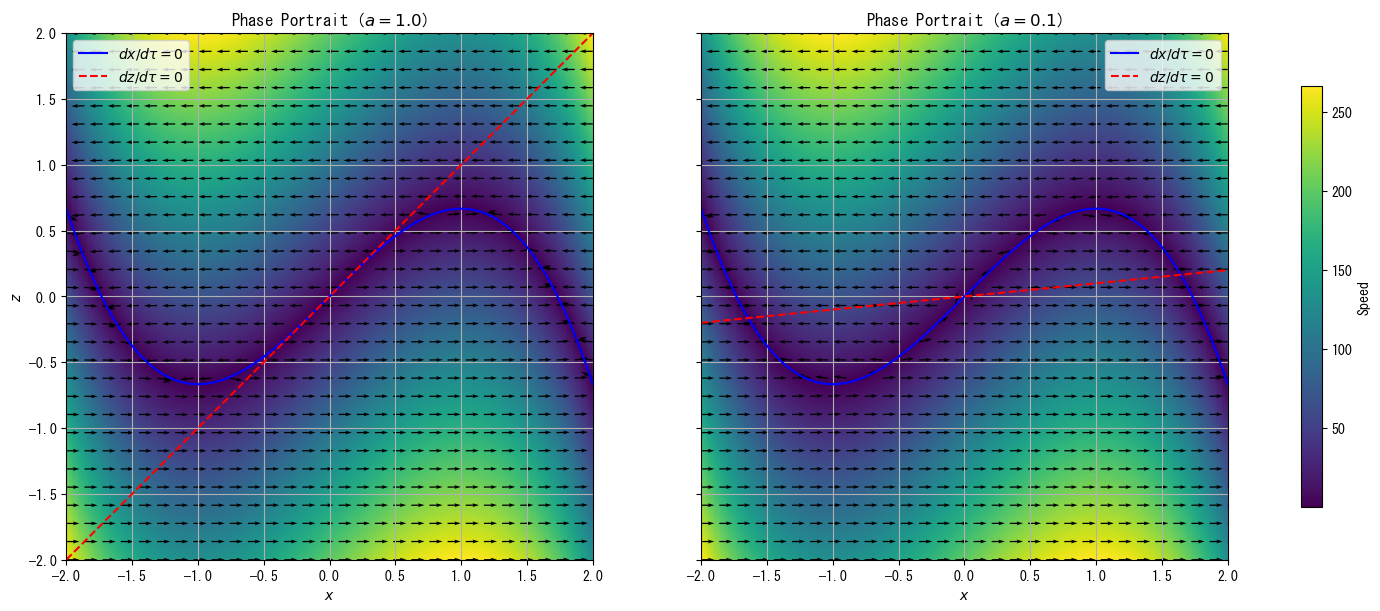

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
epsilon = 0.01
a_values = [1.0, 0.1]

# グリッド（高解像度と矢印用）
x = np.linspace(-2, 2, 300)
z = np.linspace(-2, 2, 300)
X, Z = np.meshgrid(x, z)

xq = np.linspace(-2, 2, 30)
zq = np.linspace(-2, 2, 30)
Xq, Zq = np.meshgrid(xq, zq)

# ヌルクライン共通
x_null = np.linspace(-2, 2, 400)

# 図の準備
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True, constrained_layout=True)

for i, a in enumerate(a_values):
    dxdt = (X - X**3 / 3 - Z) / epsilon
    dzdt = a * X - Z
    speed = np.sqrt(dxdt**2 + dzdt**2)

    dxq = (Xq - Xq**3 / 3 - Zq) / epsilon
    dzq = a * Xq - Zq
    magq = np.sqrt(dxq**2 + dzq**2)
    Uq = dxq / magq
    Vq = dzq / magq

    ax = axes[i]
    c = ax.pcolormesh(X, Z, speed, shading='auto', cmap='viridis')
    ax.quiver(Xq, Zq, Uq, Vq, angles='xy', scale_units='xy', scale=10, color='black')
    ax.plot(x_null, x_null - x_null**3 / 3, 'b-', label=r'$dx/d\tau = 0$')
    ax.plot(x_null, a * x_null, 'r--', label=r'$dz/d\tau = 0$')

    ax.set_title(fr'Phase Portrait ($a = {a}$)')
    ax.set_xlabel(r'$x$')
    if i == 0:
        ax.set_ylabel(r'$z$')
    ax.legend()
    ax.grid()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

# カラーバーの追加
fig.colorbar(c, ax=axes.ravel().tolist(), shrink=0.8, label='Speed')
plt.savefig("BZ_graph6.pdf", format="pdf", bbox_inches='tight')
plt.show()


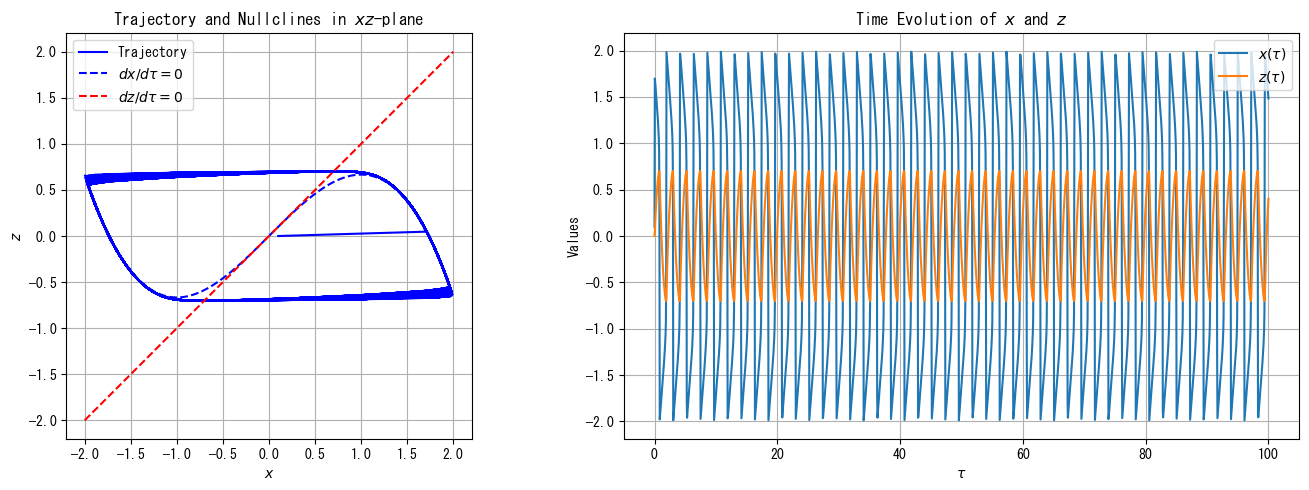

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# パラメータ
epsilon = 0.01
a = 1.0
y0 = [0.1, 0.0]  # 初期値 [x(0), z(0)]
t_span = (0, 100)
t_eval = np.linspace(*t_span, 2000)

# 微分方程式の定義
def system(tau, y):
    x, z = y
    dxdt = (x - x**3 / 3 - z) / epsilon
    dzdt = a * x - z
    return [dxdt, dzdt]

# 数値解
sol = solve_ivp(system, t_span, y0, t_eval=t_eval)
x, z, t = sol.y[0], sol.y[1], sol.t

# ヌルクライン用データ
x_null = np.linspace(-2, 2, 400)
z_null_dx = x_null - x_null**3 / 3
z_null_dz = a * x_null

# プロット
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (1) xz平面の軌跡 + ヌルクライン
axes[0].plot(x, z, label='Trajectory', color='blue')
axes[0].plot(x_null, z_null_dx, 'b--', label=r'$dx/d\tau = 0$')
axes[0].plot(x_null, z_null_dz, 'r--', label=r'$dz/d\tau = 0$')
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$z$')
axes[0].set_title('Trajectory and Nullclines in $xz$-plane')
axes[0].legend()
axes[0].grid()
axes[0].set_aspect('equal')

# (2) 時間発展
axes[1].plot(t, x, label=r'$x(\tau)$')
axes[1].plot(t, z, label=r'$z(\tau)$')
axes[1].set_xlabel(r'$\tau$')
axes[1].set_ylabel('Values')
axes[1].set_title('Time Evolution of $x$ and $z$')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from itertools import product

# パラメータ候補
epsilons = [0.01, 0.1]
a_values = [0.1, 0.7]
initial_conditions = [[-0.1, 0.0], [1, 1]]

# 時間設定
t_span = (0, 20)
t_eval = np.linspace(*t_span, 2000)

# システム定義
def system(tau, y, epsilon, a):
    x, z = y
    dxdt = (x - x**3 / 3 - z) / epsilon
    dzdt = a * x - z
    return [dxdt, dzdt]

# 実行ループ
plot_index = 1
for epsilon, a, y0 in product(epsilons, a_values, initial_conditions):
    # 数値解
    sol = solve_ivp(system, t_span, y0, t_eval=t_eval, args=(epsilon, a))
    x, z, t = sol.y[0], sol.y[1], sol.t

    # ヌルクライン
    x_null = np.linspace(-3, 3, 800)
    z_null_dx = x_null - x_null**3 / 3
    z_null_dz = a * x_null

    # グラフ描画
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    axes[0].plot(t, x, label=r'$x(\tau)$')
    axes[0].plot(t, z, label=r'$z(\tau)$')
    axes[0].set_xlabel(r'$\tau$')
    axes[0].set_ylabel('Values')
    axes[0].set_title('Time Evolution')
    axes[0].legend()
    axes[0].grid()

    text = rf"$\epsilon = {epsilon}$" + "\n" + rf"$a = {a}$" + "\n" + \
           rf"$x(0) = {y0[0]},\ z(0) = {y0[1]}$"
    axes[0].text(0.02, 0.98, text, transform=axes[0].transAxes,
                 fontsize=10, verticalalignment='top',
                 bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

    axes[1].plot(x, z, color='black', label='Trajectory')
    axes[1].plot(x_null, z_null_dx, 'b--', label=r'$dx/d\tau = 0$')
    axes[1].plot(x_null, z_null_dz, 'r--', label=r'$dz/d\tau = 0$')
    axes[1].set_xlabel(r'$x$')
    axes[1].set_ylabel(r'$z$')
    axes[1].set_title('Phase Plane')
    axes[1].set_xlim(-3, 3)
    axes[1].set_ylim(-2, 2)
    axes[1].set_aspect('equal')
    axes[1].legend()
    axes[1].grid()

    # 通し番号で保存
    fname = f"plot_{plot_index}.pdf"
    plt.tight_layout()
    plt.savefig(fname, format='pdf', bbox_inches='tight')
    plt.close()
    plot_index += 1


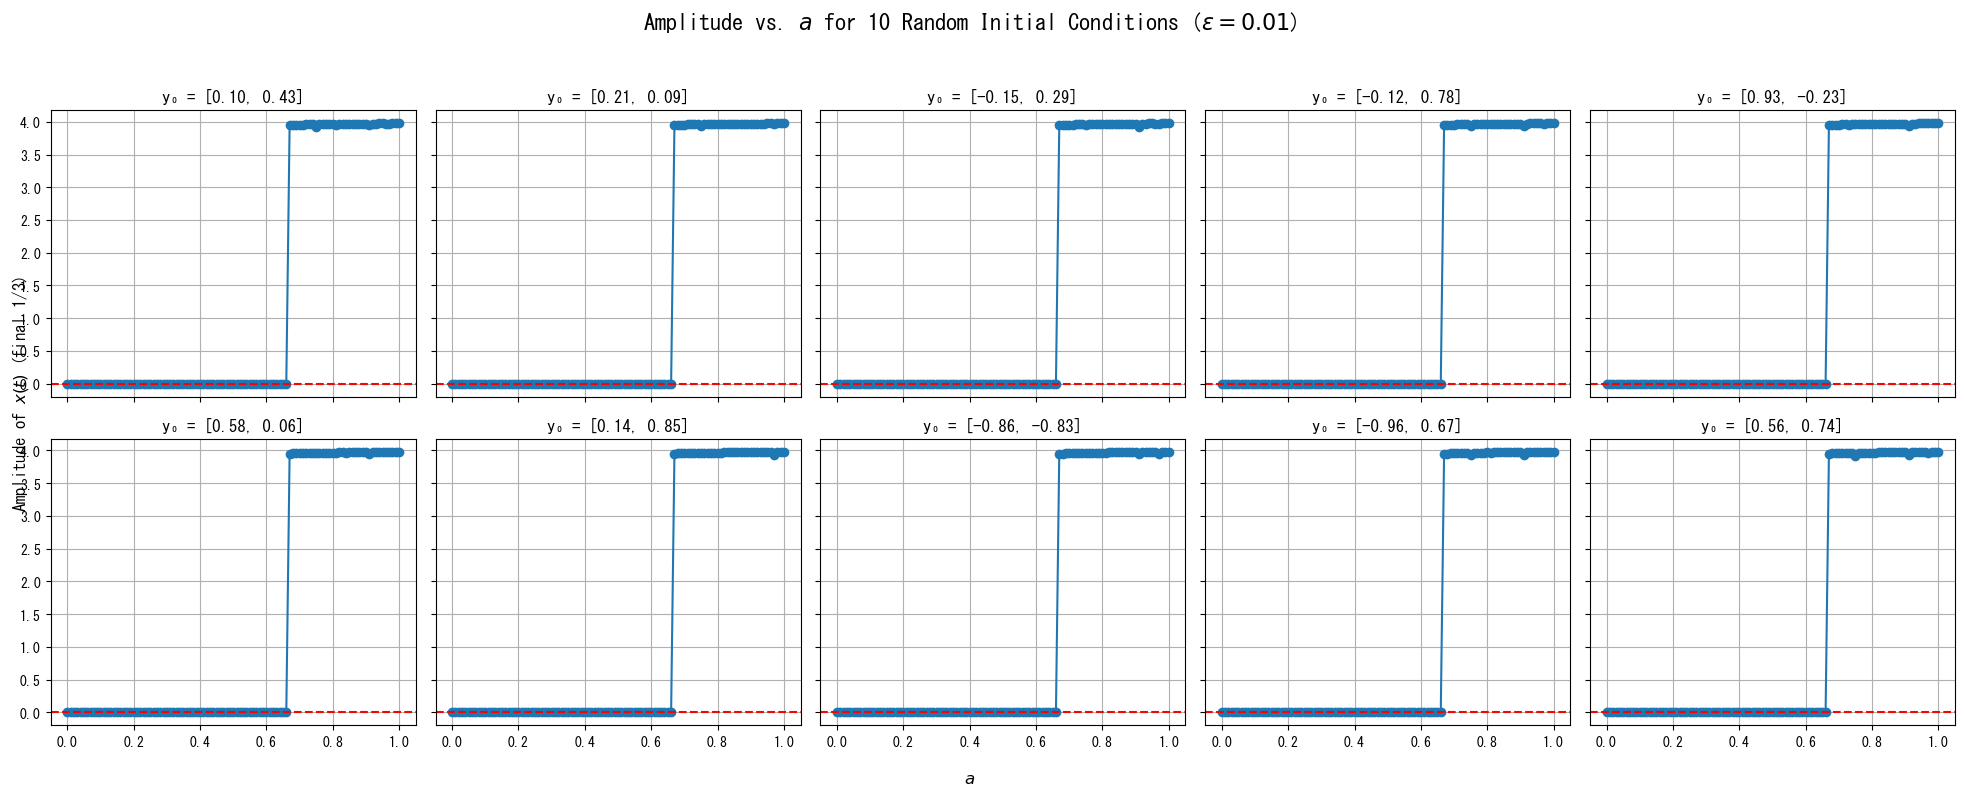

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def amplitude_vs_a(epsilon, a_values, y0, t_span, t_eval):
    def system(tau, y):
        x, z = y
        dxdt = (x - x**3 / 3 - z) / epsilon
        dzdt = a * x - z
        return [dxdt, dzdt]

    amplitudes = []
    for a in a_values:
        sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='Radau')
        x = sol.y[0]
        start = int(len(t_eval) * 2 / 3)
        amp = np.max(x[start:]) - np.min(x[start:])
        amplitudes.append(amp)
    return amplitudes

# パラメータ
epsilon = 0.01
t_span = (0, 100)
t_eval = np.linspace(*t_span, 2000)
a_values = np.round(np.arange(0.00, 1.01, 0.01), 2)

# ランダムな初期値を10個生成（x ∈ [-1, 1], z ∈ [-1, 1]）
np.random.seed(0)  # 再現性のため
initial_conditions = [np.random.uniform(-1, 1, size=2) for _ in range(10)]

# プロット
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)

for i, y0 in enumerate(initial_conditions):
    amp = amplitude_vs_a(epsilon, a_values, y0, t_span, t_eval)
    ax = axes[i // 5, i % 5]
    ax.plot(a_values, amp, marker='o')
    ax.axhline(1e-3, color='red', linestyle='--')
    ax.set_title(f'y₀ = [{y0[0]:.2f}, {y0[1]:.2f}]')
    ax.grid()

fig.suptitle('Amplitude vs. $a$ for 10 Random Initial Conditions ($\\epsilon=0.01$)', fontsize=16)
fig.supxlabel(r'$a$')
fig.supylabel('Amplitude of $x(t)$ (final 1/3)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


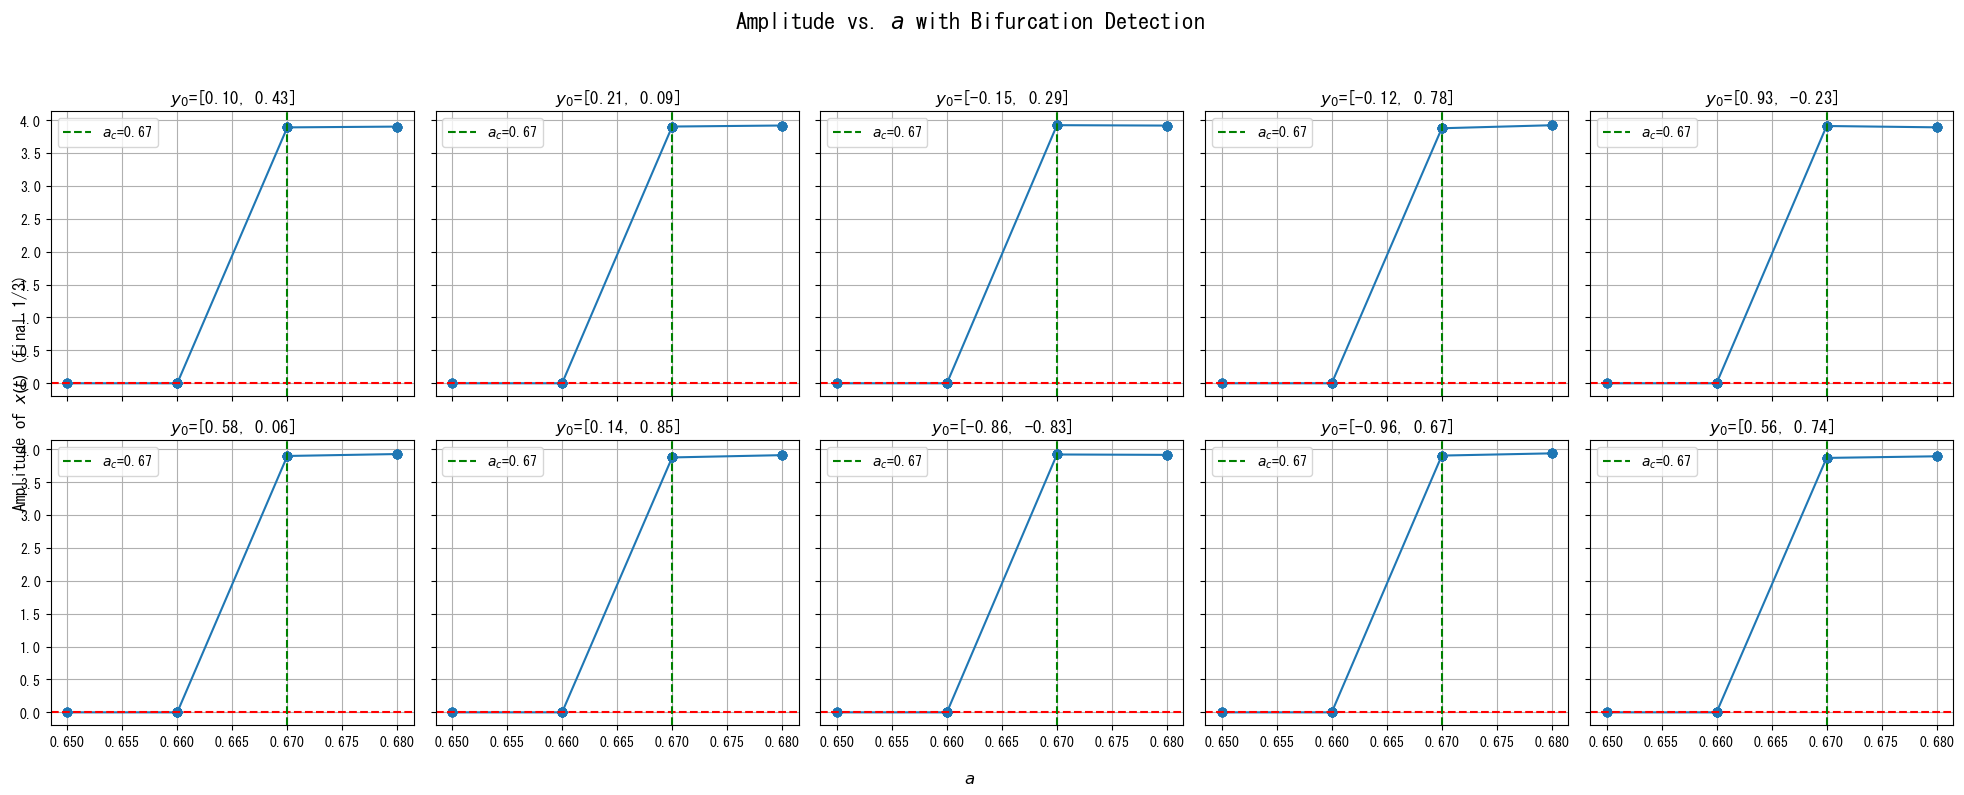

Bifurcation points (transition from steady to oscillation):
  Initial condition 1: a_c = 0.6700000000
  Initial condition 2: a_c = 0.6700000000
  Initial condition 3: a_c = 0.6700000000
  Initial condition 4: a_c = 0.6700000000
  Initial condition 5: a_c = 0.6700000000
  Initial condition 6: a_c = 0.6700000000
  Initial condition 7: a_c = 0.6700000000
  Initial condition 8: a_c = 0.6700000000
  Initial condition 9: a_c = 0.6700000000
  Initial condition 10: a_c = 0.6700000000


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def amplitude_vs_a(epsilon, a_values, y0, t_span, t_eval, threshold=1e-3):
    def system(tau, y):
        x, z = y
        dxdt = (x - x**3 / 3 - z) / epsilon
        dzdt = a * x - z
        return [dxdt, dzdt]

    amplitudes = []
    for a in a_values:
        sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='Radau')
        x = sol.y[0]
        start = int(len(t_eval) * 2 / 3)
        amp = np.max(x[start:]) - np.min(x[start:])
        amplitudes.append(amp)

    # 分岐点（初めて閾値を超える a）を見つける
    bifurcation_index = next((i for i, amp in enumerate(amplitudes) if amp > threshold), None)
    bifurcation_a = a_values[bifurcation_index] if bifurcation_index is not None else None
    return amplitudes, bifurcation_a

# パラメータ
epsilon = 0.01
t_span = (0, 100)
t_eval = np.linspace(*t_span, 200)
a_values = np.round(np.arange(0.65, 0.68, 0.001), 2)
threshold = 1e-3

# ランダムな初期値
np.random.seed(0)
initial_conditions = [np.random.uniform(-1, 1, size=2) for _ in range(10)]

# プロット
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
bifurcation_points = []

for i, y0 in enumerate(initial_conditions):
    amplitudes, a_bif = amplitude_vs_a(epsilon, a_values, y0, t_span, t_eval, threshold)
    ax = axes[i // 5, i % 5]
    ax.plot(a_values, amplitudes, marker='o')
    ax.axhline(threshold, color='red', linestyle='--')
    if a_bif is not None:
        ax.axvline(a_bif, color='green', linestyle='--', label=f'$a_c$={a_bif:.2f}')
        bifurcation_points.append(a_bif)
    ax.set_title(f'$y_0$=[{y0[0]:.2f}, {y0[1]:.2f}]')
    ax.grid()
    ax.legend()

fig.suptitle('Amplitude vs. $a$ with Bifurcation Detection', fontsize=16)
fig.supxlabel(r'$a$')
fig.supylabel('Amplitude of $x(t)$ (final 1/3)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 結果表示
print("Bifurcation points (transition from steady to oscillation):")
for i, a_bif in enumerate(bifurcation_points):
    print(f"  Initial condition {i+1}: a_c = {a_bif:.3f}")


推定されるピーク間距離（周期）: 0.1754 cm


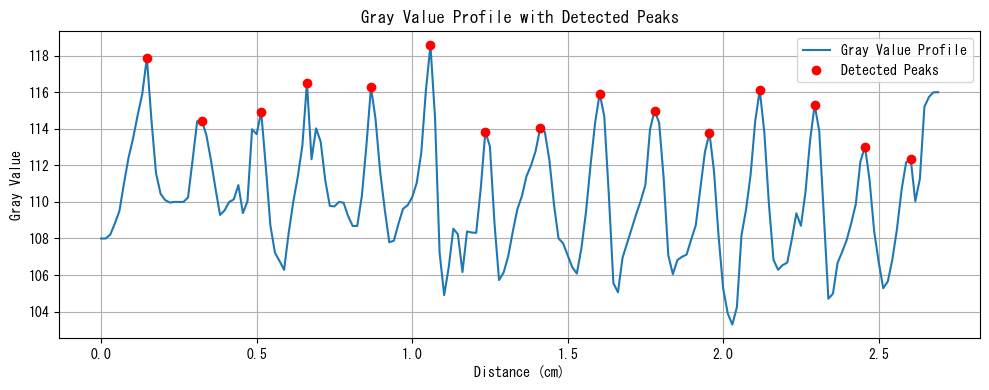

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ファイル読み込み（ヘッダーあり）
data = np.genfromtxt("dish_data.dat", delimiter=None, names=True)

# 列名に応じて読み取り（自動でカラム名が使える）
distance = data['distance']
gray = data['Gray_Value']

# ピーク検出
peaks, _ = find_peaks(gray, height=0, distance=10)
peak_positions = distance[peaks]
peak_values = gray[peaks]

# 周期の推定（距離方向）
if len(peak_positions) >= 2:
    spacings = np.diff(peak_positions)
    mean_spacing = np.mean(spacings)
    print(f"推定されるピーク間距離（周期）: {mean_spacing:.4f} cm")
else:
    print("ピークが2つ以上検出できませんでした。")

# プロット
plt.figure(figsize=(10, 4))
plt.plot(distance, gray, label='Gray Value Profile')
plt.plot(peak_positions, peak_values, 'ro', label='Detected Peaks')
plt.xlabel('Distance (cm)')
plt.ylabel('Gray Value')
plt.title('Gray Value Profile with Detected Peaks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("prominent_peaks.pdf", format='pdf', bbox_inches='tight')
plt.show()
